In [20]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# Importing the dataset
df = pd.read_csv('market_prep.csv', sep = ';')
df

,Education,Marital_Status,Income,Kidhome,Recency,NumWebVisitsMonth,Complain,all_Response,Age,CustomerDayLong,MNT,all_Purchases
0,2,4,58138.0,0,58,7.0,0.0,1.0,64.0,3314,1617.000000,25.0
1,2,4,46344.0,1,38,5.0,0.0,0.0,67.0,2764,27.000000,6.0
2,2,5,71613.0,0,26,4.0,0.0,0.0,56.0,2963,776.000000,21.0
3,2,5,26646.0,1,26,6.0,0.0,0.0,37.0,2790,53.000000,8.0
4,4,3,58293.0,1,94,5.0,0.0,0.0,40.0,2812,422.000000,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,46,5.0,0.0,0.0,54.0,3032,1294.524192,18.0
2236,4,5,64014.0,2,56,7.0,0.0,1.0,75.0,2670,444.000000,22.0
2237,2,2,56981.0,0,91,6.0,0.0,1.0,40.0,2806,1241.000000,19.0
2238,3,5,69245.0,0,8,3.0,0.0,0.0,65.0,2807,843.000000,23.0


In [22]:
df.loc[(df['all_Response']>= 1),'all_Response'] = 1

C:\Users\Masha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


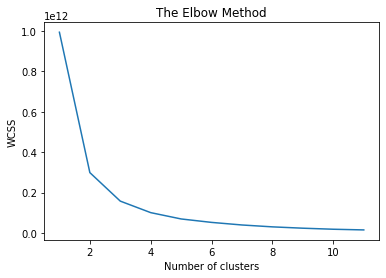

In [23]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Стоит попробовать выделить 2 и 3 класстера.

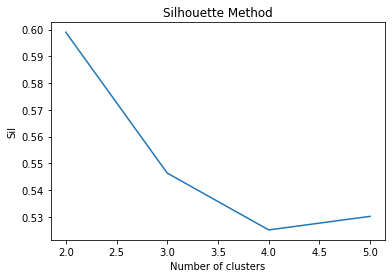

2:0.5990151682147591
3:0.5463551594749279
4:0.5251111254386658
5:0.5301825042698365


In [24]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Метод силуета показывает, что лучший результат покажет разбиение на 2 классетра, но по значениям различие не большое между 2 и 3мя кластерами согласно этому методу. Так что предпочту выбор 3х кластеров.

In [25]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Educationэ','Marital_Status','Income','Kidhome','Recency','NumWebVisitsMonth',
                                             'Complain','all_Response','Age','CustomerDayLong','MNT','all_Purchases']).round(2)

,Educationэ,Marital_Status,Income,Kidhome,Recency,NumWebVisitsMonth,Complain,all_Response,Age,CustomerDayLong,MNT,all_Purchases
0,2.48,3.74,76558.12,0.09,49.03,3.20,0.0,0.44,53.47,2993.24,1264.16,20.73
1,2.53,3.74,52149.86,0.42,49.76,5.70,0.0,0.23,54.91,3014.31,486.49,15.95
2,2.16,3.71,28267.17,0.81,48.47,6.85,0.0,0.16,47.86,3004.68,93.29,7.81


Лучшим мне кажется, разбиение на 3 класстера - это дает большую сегминтацию клиентов, что в дальнейшем может помочь.

In [27]:
# Less features
X = df.iloc[:, [2, 3, 5, 7, 10,11]]

In [28]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Income','Kidhome','NumWebVisitsMonth',
                                             'all_Response','MNT','all_Purchases']).round(2)

,Income,Kidhome,NumWebVisitsMonth,all_Response,MNT,all_Purchases
0,76558.12,0.09,3.20,0.44,1264.16,20.73
1,28267.17,0.81,6.85,0.16,93.29,7.81
2,52149.86,0.42,5.70,0.23,486.49,15.95


In [29]:
# Export km clusters
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

Сравнивать 2 метода кластеризации: к-средних и иерархический метод - нет смысла, т.к. разное кол-во кластеров было, 3 и 2, соответственно.